# Companies data set

In [1]:
import pandas as pd
df=pd.read_csv('companies.csv')
df.head()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [2]:
df.drop(['state_code', 'region'],axis=1,inplace=True)
df['first_funding_at']=df['first_funding_at'].fillna("not available")
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,Champaign,1,2010-01-01,2014-07-24,2014-07-24


Text(0.5, 1.0, 'status difference')

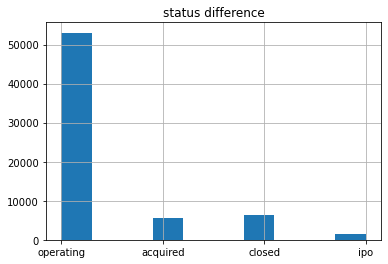

In [3]:
import matplotlib.pyplot as plt
df.status.hist()
plt.title('status difference')

As the histogram above shows, we have more companies operating as compared to acquired ones which would imply that they received far more funding and produced more than those which were acquired.

# IPO companies?

It's a situation in which one starts a business by soliciting capital from family, friends, and investors in exchange for a portion of the company. We go to an investor bank and inform them about the idea or product to raise money for this company. They will then introduce us to institutional investors / people who are interested in this idea or product, and they will sell some of the business's shares to assist in bringing the company to the public market. This helps raise a lot of money, sell shares at a reasonable price that suits the shareholder, raise more money through additional rounds of investment, and promote the brand because IPOs deliver a good credibility boost.
The disadvantages include:
When it comes to matters like openness, the SEC (Securities and Exchange Commission is the US federal agency in charge of regulating and managing financial markets) and exchanges have stringent criteria. As a result, public firms are required to reveal a great deal of business-related information, which may result in competitors obtaining access to material that is the company's trade secret.
Less control as shareholders will now affect decision making.


We'll now separate companies in to 3 status categories; operating, acquired, and ipo. Then we'll compare the funding rounds based on these statuses.

In [4]:
operating=df.loc[df['status']=='operating']
acquired=df.loc[df['status']=='acquired']
ipo=df.loc[df['status']=='ipo']

# Operating companies

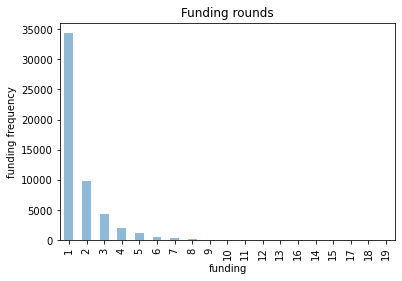

In [5]:

import matplotlib.pyplot as plt
operating.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

The above curve can be matched to the values below and we can deduce that operating companies get more one time funding rounds that two.

In [6]:
operating['funding_rounds'].value_counts()

1     34367
2      9871
3      4366
4      2066
5      1119
6       554
7       312
8       150
9        91
10       55
11       31
12       24
13       11
16        5
14        4
15        3
17        2
18        2
19        1
Name: funding_rounds, dtype: int64

Now we will see how this differs from acquired companies.

# Acquired companies 

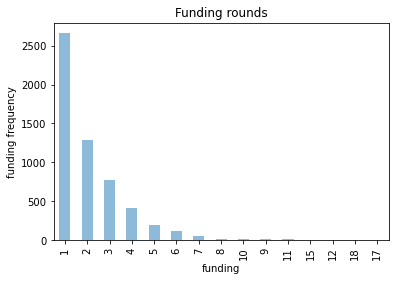

In [7]:
#acquired companies

plt.title('funding rounds for aqcuired companies')
acquired.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

This can be confirmed and further understood with the values below.

In [8]:
acquired['funding_rounds'].value_counts()

1     2664
2     1287
3      772
4      411
5      194
6      115
7       54
8       15
10      13
9       11
11       9
15       1
12       1
18       1
17       1
Name: funding_rounds, dtype: int64

As we can see, both operating and acquired companies get more one time funding rounds than 2 with operating companies having by far the largest fundings. For IPO companies is illustrated below.

# IPO companies

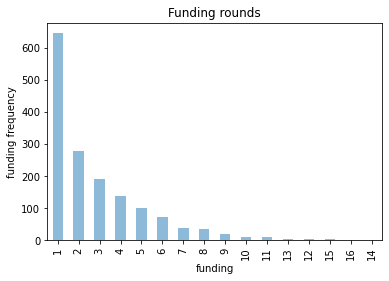

In [9]:
#ipo companies

plt.title('funding rounds for IPO companies')
ipo.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

In [10]:
ipo['funding_rounds'].value_counts()

1     646
2     277
3     192
4     137
5     100
6      72
7      39
8      36
9      18
10     10
11      9
13      4
12      3
15      2
16      1
14      1
Name: funding_rounds, dtype: int64

We can conclude that operating companies exceed in founding rounds but all have higher one time fundings.

# Investments data set part

In [11]:
d=pd.read_csv('investments.csv')
d.head()


,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [12]:
d.drop([ 'company_state_code','company_region','investor_state_code','investor_region'],axis=1,inplace=True)
d['raised_amount_usd']=d['raised_amount_usd'].fillna("not available")
d['funding_round_code']=d['funding_round_code'].fillna("not available")
d['company_country_code']=d['company_country_code'].fillna("not provided")
d['investor_country_code']=d['investor_country_code'].fillna("not provided")
d.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,investor_permalink,investor_name,investor_country_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,not available,2014-07-24,not available
2,/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,not available,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/capital-one,Capital One,USA,Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,not available,2013-05-22,3000000.0


In [13]:
d.drop_duplicates(subset=['company_country_code'])
d.drop_duplicates(subset=['investor_country_code'])
d.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,investor_permalink,investor_name,investor_country_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,not available,2014-07-24,not available
2,/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,not available,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/capital-one,Capital One,USA,Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,not available,2013-05-22,3000000.0


# How many investors do we have in different countries and which country dominates?

In [14]:
d.investor_country_code.value_counts()

USA             96341
not provided    30939
GBR              7616
DEU              3256
FRA              3007
                ...  
TTO                 1
MAR                 1
IRN                 1
BAH                 1
GIB                 1
Name: investor_country_code, Length: 99, dtype: int64

In [15]:
d.company_country_code.value_counts()

USA             112283
not provided     10521
GBR               8579
CAN               4009
CHN               3778
                 ...  
NPL                  1
MDA                  1
ALB                  1
GGY                  1
MCO                  1
Name: company_country_code, Length: 126, dtype: int64

The above data shows that we have more investors in the USA and companies receiving investments as compared to othe countries.


# Which investor dominates the market?

In [16]:
d['investor_name'].value_counts()

Sequoia Capital               1033
Wayra                          936
500 Startups                   932
New Enterprise Associates      902
Intel Capital                  861
                              ... 
Shazad Mohammed                  1
Rick Gibson                      1
Smurfit Family Investments       1
Naren Nachiappan                 1
Serkan Erdoğan                   1
Name: investor_name, Length: 30189, dtype: int64

As we can see, Sequoia Capital dominates the market. Wayra and 500 Startups seem to be quit close in count from which we could deduce that they are competitors just like the rest of the companies in the list but the fact that their count have a 4 point gap could mean that they follow up on one another.

# Which company is most famous amongst investors?

In [17]:
d['company_name'].value_counts()

Uber                                          64
DocuSign                                      61
Fab                                           61
Pinterest                                     60
Mattermark                                    59
                                              ..
Kirondo                                        1
Kiras Kiss                                     1
Kipu Systems                                   1
Kippt                                          1
İnovatiff Reklam ve Tanıtım Hizmetleri Tic     1
Name: company_name, Length: 44578, dtype: int64

The above data shows that the Uber company dominates the market with DocuSign and Fab having the same count which may infere that one is as trust worth as the other. The fact Uber is at the top of the list also tells us that this company has a lot of credibility in the eyes of investors. 

# What about these company's specialization as compared to investment?Which category (field) attracts more funding? 

 We will check for both companies and investments dataframes.

In [18]:
#companies
df = df[df.category_list!= 'NaN']
df.category_list.value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

In [19]:
#investments
d = d[d.company_category_list!= 'NaN']
d.company_category_list.value_counts()

Biotechnology                                               10041
Software                                                     8931
Mobile                                                       3178
Enterprise Software                                          3002
E-Commerce                                                   2980
                                                            ...  
Curated Web|E-Commerce|Online Reservations|Online Travel        1
Hedge Funds|Market Research|Trading                             1
Curated Web|Home & Garden                                       1
E-Commerce|Furniture|Home & Garden|Lighting                     1
Consumer Goods|E-Commerce|Internet                              1
Name: company_category_list, Length: 19453, dtype: int64

# Are most of the investors also acquirers?

In [20]:
p=pd.read_csv("acquisitions.csv")
p.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2001-02-02,2001-02,NaN,USD


In [21]:
p.drop(['company_state_code', 'company_region','acquirer_state_code','acquirer_region'],axis=1,inplace=True)
p['company_category_list']=p['company_category_list'].fillna("not provided")
p['company_country_code']=p['company_country_code'].fillna("not provided")


p.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,not provided,not provided,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,not provided,USA,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,not provided,not provided,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,Mamaroneck,2001-02-02,2001-02,NaN,USD


In [22]:
p.acquirer_name.value_counts()

Cisco                                    193
Google                                   176
Microsoft                                161
IBM (International Business Machines)    138
Yahoo!                                   118
                                        ... 
Prime Active Capital                       1
Wilcon                                     1
Eco Green Auto Clean                       1
Iotum                                      1
2000                                       1
Name: acquirer_name, Length: 9475, dtype: int64

In [23]:
p.company_name.value_counts()

Unveil Technologies              6
Ufree                            6
California Apostille Services    5
Travel Channel                   4
Ziff Davis                       4
                                ..
Focal Labs                       1
Focus                            1
Focus Group                      1
Focus Systems                    1
USA                              1
Name: company_name, Length: 18503, dtype: int64

Shockingly, the first to top the list is Cisco unlike in the investor data set where Sequoia Capital tops the list. Also, it can be noticed that the companies which have had the most share acquisitions are Unveil Technologies and Ufree.

# What can some of the null or missing values infer?

In [24]:
p.isna().sum()

company_permalink             0
company_name                  0
company_category_list         0
company_country_code          0
company_city               4910
acquirer_permalink            0
acquirer_name                 0
acquirer_category_list     2388
acquirer_country_code      1170
acquirer_city              1359
acquired_at                  12
acquired_month               14
price_amount              13956
price_currency_code           6
dtype: int64

* The null values in the price_amount column may mean that the acquisition process have not being completed, was cancelled, or the files containing this information are not available.

* Null in company_city may point out that either the location of the company is unexact or that the acquisition process was cancelled. The reverse may be true in case with the acquirer_city.